In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
print("Setup Complete")

Setup Complete


In [2]:
f = open('AndrewNg/ex1data1.txt')
df = pd.read_csv(f,names=["Population","Profit"])
m = df["Population"].count()

In [3]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit')

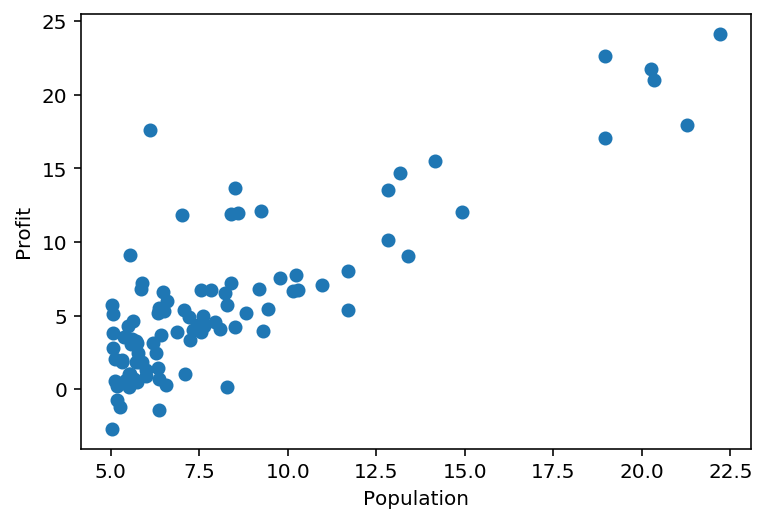

In [4]:
fig,ax = plt.subplots()
ax.scatter(df["Population"],df["Profit"])
ax.set_xlabel("Population")
ax.set_ylabel("Profit")

In [5]:
Ones = np.ones(m)
Zeroes = np.zeros(m)
x = np.vstack((Ones,df["Population"].values))
y = df["Profit"].values
theta = np.zeros(2)

In [6]:
def CostFunction(theta,x,y,m):
    chi2 = (theta.dot(x)-y)**2
    J = 1/2/m*np.sum(chi2)
    return J
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [7]:
CostFunction(theta,x,y,m)

32.072733877455676

In [27]:
itr = 1500
alpha = 0.01

def grdDsnt(alpha,itr,x,y,theta,m):
    J_hist = []
    for i in range(itr):
        err = (theta.dot(x)-y)
        theta -= alpha/m*err.dot(np.transpose(x))
        J_hist.append(CostFunction(theta,x,y,m))
    return theta,J_hist

theta_after, J_history = grdDsnt(alpha,itr,x,y,theta,m)
print("h="+str(theta_after[1])+"x+"+str(theta_after[0])+" with J = " + str(J_history[-1]))

h=1.1929146974563851x+-3.894596867456128 with J = 4.4769715036016695


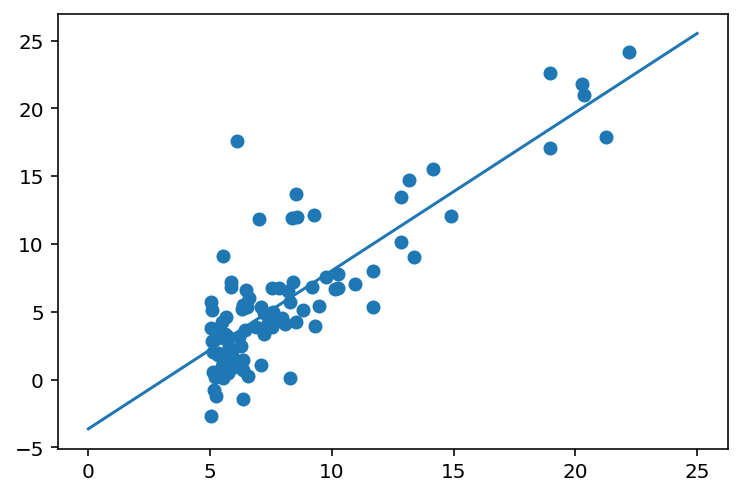

In [9]:
X = np.linspace(0,25)
plt.plot(X,theta[0]+theta[1]*X)
plt.scatter(df["Population"],df["Profit"])
plt.show()

In [10]:
X = np.linspace(-10,10,100)
Y = np.linspace(-5,5,100)
J_Vals = np.zeros((len(X),len(Y)))
for i in range(100):
    for j in range(100):
        t = np.array([[X[i], Y[j]]])
        J_Vals[i,j] = CostFunction(t,x,y,m)


In [25]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X,Y,J_Vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.show()
def plot3D(angle=(0,360),color=list(plt.colormaps())):
    ax.view_init(10,angle)
    surf=ax.plot_surface(X,Y,J_Vals,cmap=color)
    plt.draw()

interact(plot3D)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=180, description='angle', max=360), Dropdown(description='color', option…

<function __main__.plot3D(angle=(0, 360), color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r

In [13]:
f2 = open("AndrewNg/ex1data2.txt")
df2 = pd.read_csv(f2,names=["Size","Bedroom","Price"])

In [14]:
df2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
df_Prtlnd = (df2 - df2.mean())/df2.std()
m_new = len(df2)

In [235]:
x_multi = np.append(np.ones((1,m_new)),df_Prtlnd.values[:,0].reshape(1,m_new),axis=0)
x_multi = np.append(x_multi,df_Prtlnd.values[:,1].reshape(1,m_new),axis=0)
y_multi = df_Prtlnd["Price"].values
theta_multi = np.zeros((1,3))
x_multi.shape

(3, 47)

In [236]:
CostFunction(theta_multi,x_multi,y_multi,m_new)

0.4893617021276596

In [237]:
theta_m_after, J_history_m = grdDsnt(alpha,itr,x_multi,y_multi,theta_multi,m_new)

In [238]:
print(J_history_m[-1])

0.13068670606095903


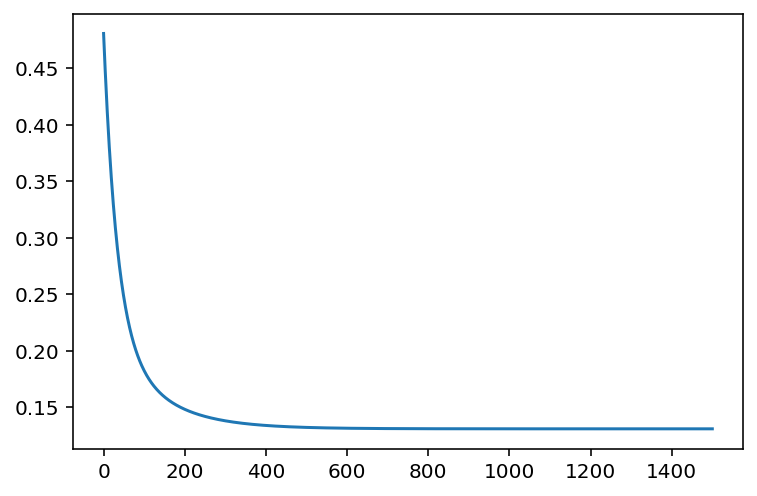

In [260]:
it = np.linspace(0,1500,1500)
plt.plot(it,J_history_m)